# ***#Creating a dataset Using API***

In [1]:
!pip install praw

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.0/191.0 kB 5.0 MB/s eta 0:00:00


In [2]:
import praw

user_agent = "Reddit_Scrapper 1.0 by /u/FeatureChoice5036"
reddit = praw.Reddit(
    client_id="VOpGfy-fqDmZYrvUtk7F7A",
    client_secret="kFyW-w6Ll2O2ZIV4It-qGIqtv4KkbQ",
    user_agent=user_agent
)

In [3]:
import pandas as pd
import numpy as np
import re #RegEx : Regular expression

# ***#Hot new rising topics***

In [4]:
# Hot new rising topics

headlines = set()
for submission in reddit.subreddit("Starbucks").hot(limit=None):
    print(submission.title)#Subreddit Title
    print(submission.id) #ID
    print(submission.author) #Author of the subreddit
    print(submission.created_utc) #Date and time being created
    print(submission.score) # Average Score
    print(submission.upvote_ratio) # Upvote ratio
    print(submission.url) # Like to the Subreddit
    break
    headlines.add(submission.title)
print(len(headlines))

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



“I am in a rush”
1aqkw1x
Even-Commission79
1707910730.0
552
0.99
https://i.redd.it/7pewfhxgfjic1.jpeg
0


In [6]:
headlines = set()
for submission in reddit.subreddit("Starbucks").hot(limit=None):
    headlines.add(submission.title)
print(len(headlines))

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

952


In [7]:
df = pd.DataFrame(headlines)
df.head()

,0
0,My friend cut me off because I went to Starbuc...
1,Fruity taste bathroom
2,Is Starbucks Oatmilk gluten free?
3,"Pdc coming up, help"
4,Just how. The Danish looked way too white


In [8]:
df.columns = ['Titles']
df.head()

,Titles
0,My friend cut me off because I went to Starbuc...
1,Fruity taste bathroom
2,Is Starbucks Oatmilk gluten free?
3,"Pdc coming up, help"
4,Just how. The Danish looked way too white


In [9]:
df.Titles.duplicated().sum()

0

# ***#Regex and pipeline***

In [10]:
import regex as re
import nltk
#stopwords

nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))
print(stopwords)

def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)

def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]

#pipeline

pipeline = [str.lower, tokenize, remove_stop]
def prepare(text, pipeline):
    tokens = text
    for fun in pipeline:
        tokens = fun(tokens)
    return tokens


{'as', "you'd", 'did', 'ma', 'nor', 'i', 'yours', 'these', 'are', 'ours', 'yourselves', 'have', 's', 'on', "you'll", 'hadn', 'won', 'into', 'when', 'why', "couldn't", 'mightn', 'shouldn', 'then', 'them', "wasn't", 'against', 'after', 'you', "mightn't", 'than', 'wouldn', "shouldn't", 'a', 'it', 't', 're', 'being', "haven't", "mustn't", 'haven', 'both', 'such', 'where', 'other', 'has', 'in', 'out', 'during', 'but', 'an', "hadn't", 'couldn', 'under', 'weren', 'only', 'once', 'which', 'some', 'and', 'can', 'now', 'having', 'whom', 'ourselves', "it's", "don't", 'of', 'd', "you're", 'itself', 'themselves', 'don', 'hasn', 'he', "aren't", 'what', 'to', 'how', 'too', 'be', 'each', "she's", 'there', 'me', 'do', "needn't", 'again', 'hers', "should've", 'my', 'who', 'is', 'same', 'were', 'yourself', 'or', 'from', 'own', "you've", 'will', 'because', 'more', 'm', "won't", 'herself', 'up', 'his', 'at', 'didn', 'very', 'our', "wouldn't", 'they', 'those', 'him', 'theirs', 'through', 'this', "that'll", 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [11]:
df['tokens'] = df['Titles'].apply(prepare, pipeline=pipeline)
df.head()

,Titles,tokens
0,My friend cut me off because I went to Starbuc...,"[friend, cut, went, starbucks, vent]"
1,Fruity taste bathroom,"[fruity, taste, bathroom]"
2,Is Starbucks Oatmilk gluten free?,"[starbucks, oatmilk, gluten, free]"
3,"Pdc coming up, help","[pdc, coming, help]"
4,Just how. The Danish looked way too white,"[danish, looked, way, white]"


In [12]:
from collections import Counter

counter = Counter()
df['tokens'].map(counter.update)
print(counter.most_common(5))

[('starbucks', 79), ('oleato', 52), ('drink', 50), ('question', 36), ('coffee', 34)]


In [13]:
freq_df = pd.DataFrame.from_dict(counter,orient='index', columns=['freq'])
freq_df = freq_df.query('freq >= 1')
freq_df.index.name = 'token'
freq_df = freq_df.sort_values('freq', ascending=False)
freq_df.head(10)

,freq
token,
starbucks,79
oleato,52
drink,50
question,36
coffee,34
new,33
cold,31
order,29
drinks,29


In [14]:
freq_df.describe()

,freq
count,1538.000000
mean,2.388166
std,4.224604
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,79.000000


# ***#Word frequency***

[Text(0.5, 0, 'Frequency'), Text(0, 0.5, 'Token'), Text(0.5, 1.0, 'Top Words')]

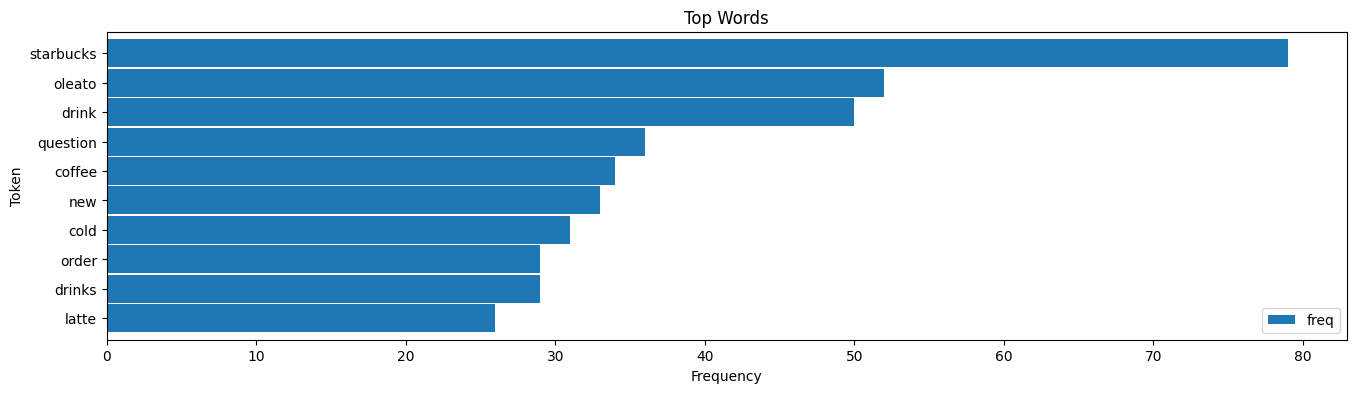

In [16]:
ax = freq_df.head(10).plot(kind='barh', width=0.95, figsize=(16,4))
ax.invert_yaxis()
ax.set(xlabel='Frequency', ylabel='Token', title='Top Words')

# ***Sentimental score***

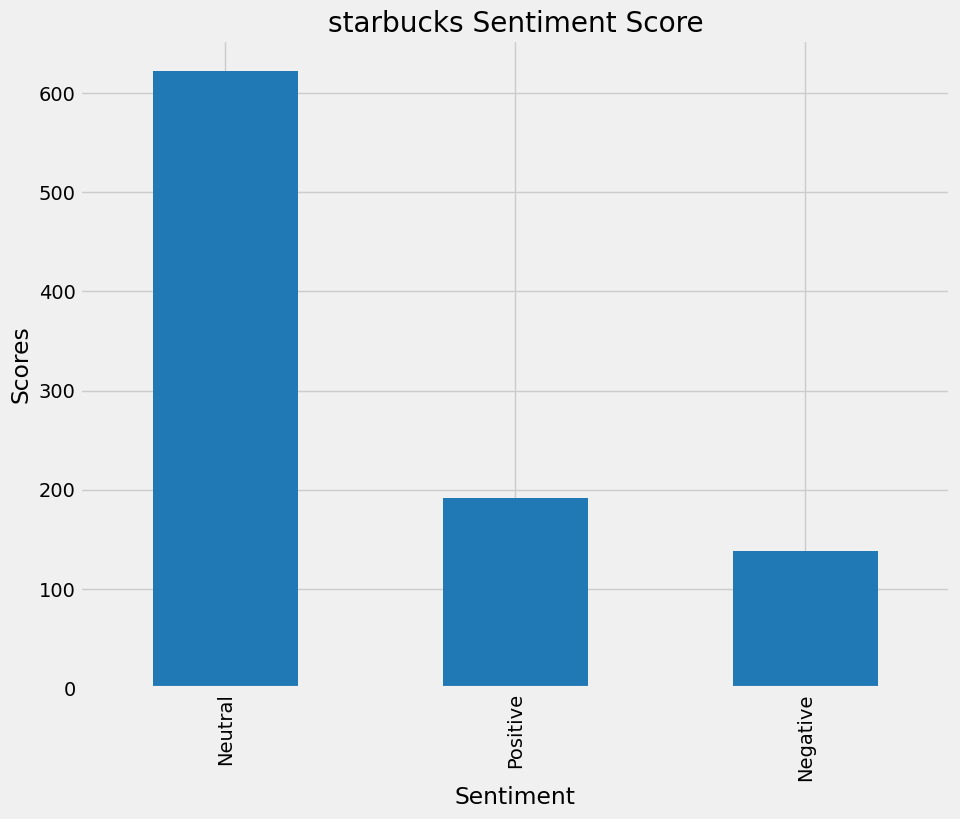

In [23]:
import seaborn as sns
import warnings

plt.style.use('fivethirtyeight')
plt.title("starbucks Sentiment Score")
plt.xlabel("Sentiment")
plt.ylabel("Scores")
plt.rcParams["figure.figsize"] = (10,8)
df["Insight"].value_counts().plot(kind="bar", color="#2078B4")
plt.show()

# ***#different types of plots***

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Titles        952 non-null    object 
 1   tokens        952 non-null    object 
 2   Subjectivity  952 non-null    float64
 3   Polarity      952 non-null    float64
 4   Insight       952 non-null    object 
 5   score         952 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 44.8+ KB


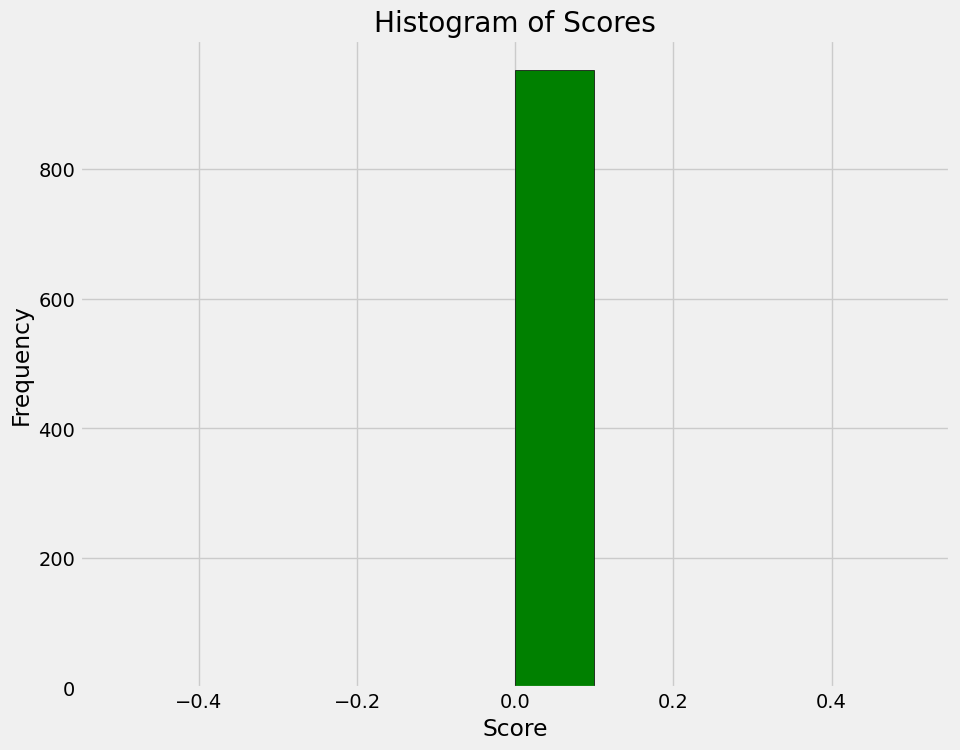

In [40]:
#histogram plot

import matplotlib.pyplot as plt
df.info()
df.head()
"score" in df.columns
if "score" not in df.columns:
    df["score"] = 0
plt.hist(df['score'], bins=10, color='green', edgecolor='black')
plt.title('Histogram of Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()


In [71]:
df['length'] = df['Titles'].str.len()
df.head()

,Titles,tokens,Subjectivity,Polarity,Insight,score,Bing_Liu_Score,length
0,My friend cut me off because I went to Starbuc...,"[friend, cut, went, starbucks, vent]",0.0,0.0,Neutral,0,-1,55
1,Fruity taste bathroom,"[fruity, taste, bathroom]",0.0,0.0,Neutral,0,0,21
2,Is Starbucks Oatmilk gluten free?,"[starbucks, oatmilk, gluten, free]",0.8,0.4,Positive,0,1,33
3,"Pdc coming up, help","[pdc, coming, help]",0.0,0.0,Neutral,0,0,19
4,Just how. The Danish looked way too white,"[danish, looked, way, white]",0.0,0.0,Neutral,0,0,41


<Axes: >

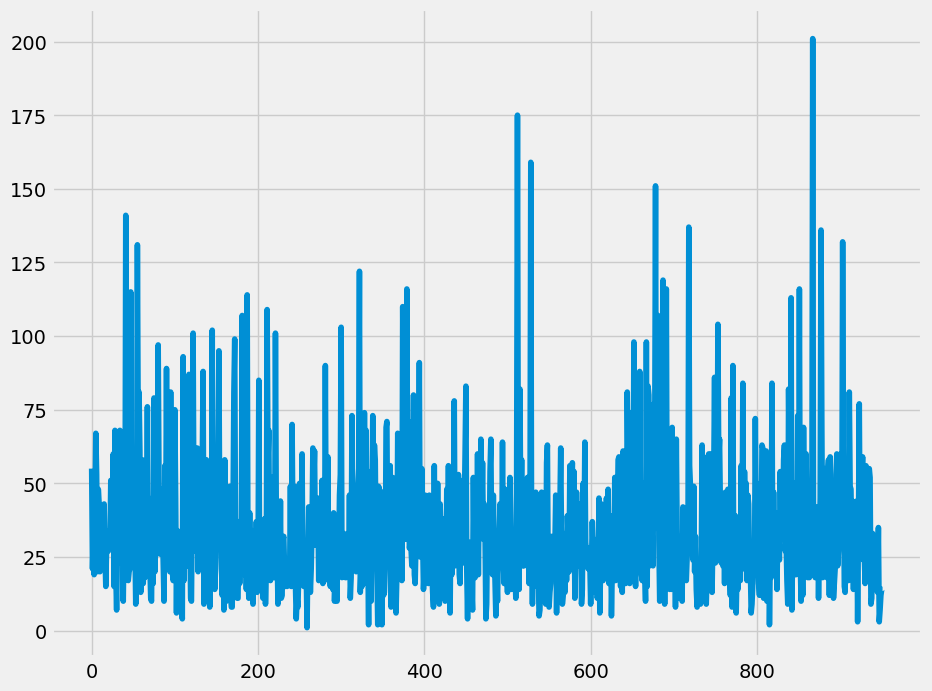

In [78]:
df['length'].plot()

<Axes: ylabel='Frequency'>

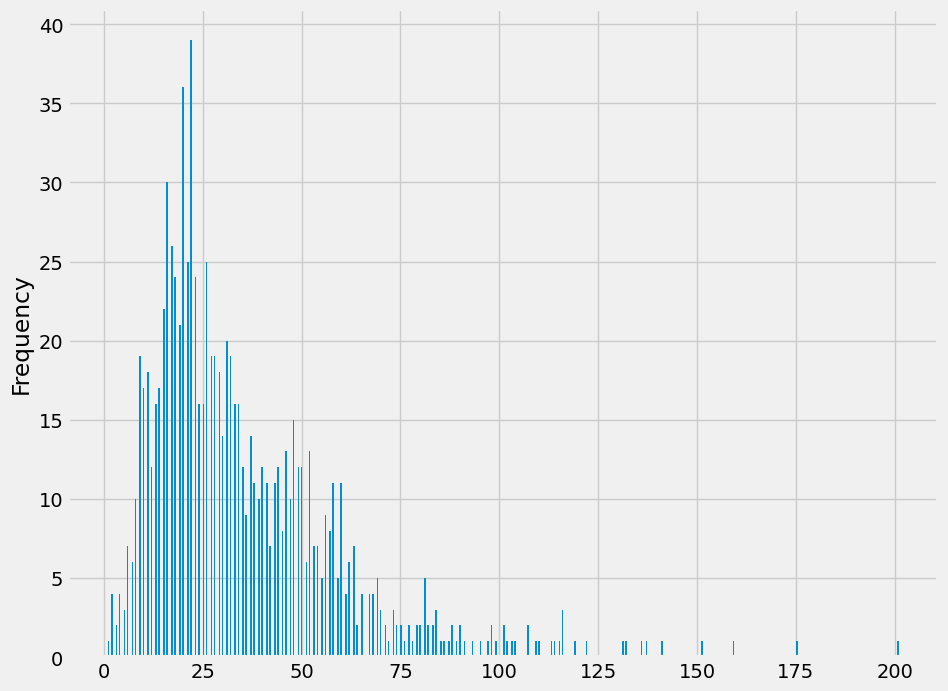

In [76]:
df['length'].plot(kind = 'hist', bins = 500)

# ***#word cloud***

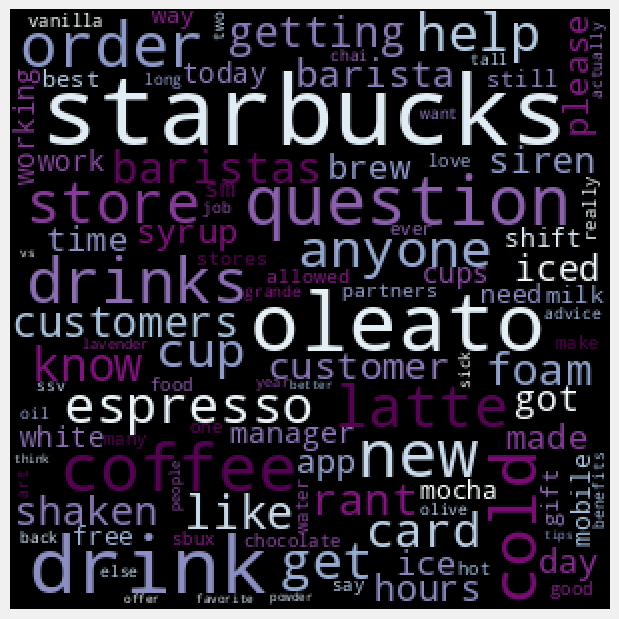

In [80]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt

wc = WordCloud(background_color='black', contour_color = 'blue', colormap = 'BuPu_r', width = 300, height=300,max_words=100, margin=2)
wc.fit_words(freq_df['freq'].to_dict() )
plt.figure(figsize = (6, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

# ***Sentimental analysis***

In [20]:
#sentiment analysis

from textblob import TextBlob

def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity


def getPolarity(text):
    return TextBlob(text).sentiment.polarity

def getInsight(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"


df['Subjectivity'] = df['Titles'].apply(getSubjectivity)
df['Polarity'] = df['Titles'].apply(getPolarity)
df["Insight"] = df["Polarity"].apply(getInsight)

df.head(30)

,Titles,tokens,Subjectivity,Polarity,Insight
0,My friend cut me off because I went to Starbuc...,"[friend, cut, went, starbucks, vent]",0.000000,0.000000,Neutral
1,Fruity taste bathroom,"[fruity, taste, bathroom]",0.000000,0.000000,Neutral
2,Is Starbucks Oatmilk gluten free?,"[starbucks, oatmilk, gluten, free]",0.800000,0.400000,Positive
3,"Pdc coming up, help","[pdc, coming, help]",0.000000,0.000000,Neutral
4,Just how. The Danish looked way too white,"[danish, looked, way, white]",0.000000,0.000000,Neutral
5,Gorgelicious hazelnut oat shaken espresso with...,"[gorgelicious, hazelnut, oat, shaken, espresso...",1.000000,-0.600000,Negative
6,Dream is trash. Company really messed up losin...,"[dream, trash, company, really, messed, losing...",0.200000,0.200000,Positive
7,Caramel Brûlée Latte,"[caramel, brûlée, latte]",0.000000,0.000000,Neutral
8,here is your reminder to clean under the freezer,"[reminder, clean, freezer]",0.700000,0.366667,Positive
9,Awkward custie here - help w/ order please?,"[awkward, custie, help, w, order, please]",1.000000,-0.600000,Negative


# ***Bing Liu score***

In [45]:
!pip install nltk

In [46]:
import nltk
nltk.download('opinion_lexicon')

[nltk_data] Downloading package opinion_lexicon to /root/nltk_data...
[nltk_data]   Unzipping corpora/opinion_lexicon.zip.


True

In [47]:
from nltk.corpus import opinion_lexicon
from nltk.tokenize import word_tokenize
print('Total number of words in opinion lexicon', len(opinion_lexicon.words()))
print('Examples of positive words in opinion lexicon',opinion_lexicon.positive()[:10])
print('Examples of negative words in opinion lexicon',opinion_lexicon.negative()[:10])

Total number of words in opinion lexicon 6789
Examples of positive words in opinion lexicon ['a+', 'abound', 'abounds', 'abundance', 'abundant', 'accessable', 'accessible', 'acclaim', 'acclaimed', 'acclamation']
Examples of negative words in opinion lexicon ['2-faced', '2-faces', 'abnormal', 'abolish', 'abominable', 'abominably', 'abominate', 'abomination', 'abort', 'aborted']


In [67]:
pos_score = 1
neg_score = -1
word_dict = {}

for word in opinion_lexicon.positive():
    word_dict[word] = pos_score


for word in opinion_lexicon.negative():
    word_dict[word] = neg_score

def bing_liu_score(text):
    sentiment_score = 0
    bag_of_words = word_tokenize(text.lower())
    for word in bag_of_words:
        if word in word_dict:
            sentiment_score += word_dict[word]
    return sentiment_score

df['Bing_Liu_Score'] = df['Titles'].apply(bing_liu_score)

In [68]:
df[["Titles", 'Bing_Liu_Score']].head(50)

,Titles,Bing_Liu_Score
0,My friend cut me off because I went to Starbuc...,-1
1,Fruity taste bathroom,0
2,Is Starbucks Oatmilk gluten free?,1
3,"Pdc coming up, help",0
4,Just how. The Danish looked way too white,0
5,Gorgelicious hazelnut oat shaken espresso with...,-1
6,Dream is trash. Company really messed up losin...,-3
7,Caramel Brûlée Latte,0
8,here is your reminder to clean under the freezer,1
9,Awkward custie here - help w/ order please?,-1
